In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from enum import Enum
from collections import Counter
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [147]:
xe136cross=pd.read_csv('../crosssections/Xe136_N_XSec.csv',engine='python',header=None,delim_whitespace=True)
xe131cross=pd.read_csv('../crosssections/Xe131_N_XSec.csv',engine='python',header=None,delim_whitespace=True)
xe126cross=pd.read_csv('../crosssections/Xe126_N_XSec.csv',engine='python',header=None,delim_whitespace=True)
He3cross=pd.read_csv('../crosssections/He3_N_XSec.csv',engine='python',header=None,delim_whitespace=True)
Ar40cross=pd.read_csv('../crosssections/Ar40_N_XSec.csv',engine='python',header=None,delim_whitespace=True)
B10cross=pd.read_csv('../crosssections/B10_N_XSec.csv',engine='python',header=None,delim_whitespace=True)


Xe136_N_El=pd.read_csv('../crosssections/Xe136_N_El_XSec.csv',engine='python',header=None,delim_whitespace=True)
Xe136_N_Inel=pd.read_csv('../crosssections/Xe136_N_Inel_XSec.csv',engine='python',header=None,delim_whitespace=True)
Xe136_N_Tot=pd.read_csv('../crosssections/Xe136_N_Tot_XSec.csv',engine='python',header=None,delim_whitespace=True)


He3_N_El=pd.read_csv('../crosssections/He3_N_El_XSec.csv',engine='python',header=None,delim_whitespace=True)
He3_N_Tot=pd.read_csv('../crosssections/He3_N_Tot_XSec.csv',engine='python',header=None,delim_whitespace=True)


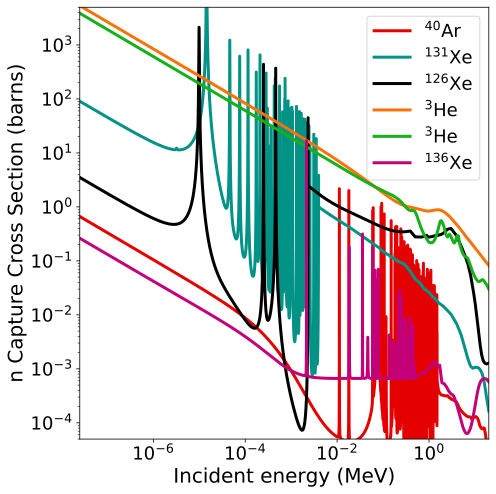

In [148]:
plt.figure(figsize=(7,7))

plt.plot(Ar40cross[0]*1e-6,Ar40cross[1],label="$^{40}$Ar",color='xkcd:red',lw=3)
plt.plot(xe131cross[0]*1e-6,xe131cross[1],label="$^{131}$Xe",color='xkcd:teal',lw=3)
plt.plot(xe126cross[0]*1e-6,xe126cross[1],label="$^{126}$Xe",color='xkcd:black',lw=3)
plt.plot(He3cross[0]*1e-6,He3cross[1],label="$^{3}$He",color='xkcd:orange',lw=3)
plt.plot(B10cross[0]*1e-6,B10cross[1],label="$^{10}$B",color='xkcd:green',lw=3)
plt.plot(xe136cross[0]*1e-6,xe136cross[1],label="$^{136}$Xe",color='xkcd:magenta',lw=3)

plt.semilogx()
plt.semilogy()
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
plt.ylim(5e-5,5000)  
plt.xlim(25e-9,20)
plt.ylabel("n Capture Cross Section (barns)",fontsize=20)
plt.xlabel('Incident energy (MeV)',fontsize=20)
plt.tight_layout()
plt.legend(fontsize=18,loc='upper right')
plt.show()

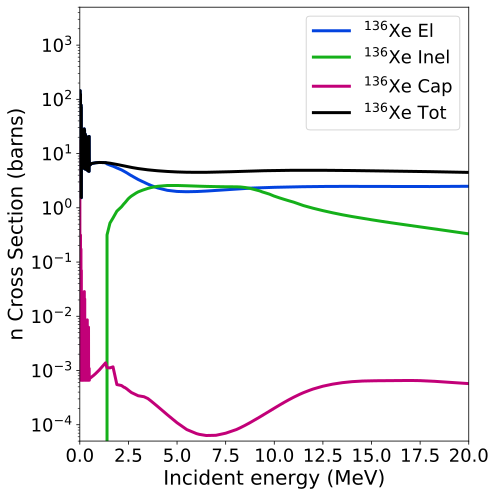

In [56]:
plt.figure(figsize=(7,7))

plt.plot(Xe136_N_El[0]*1e-6,Xe136_N_El[1],label="$^{136}$Xe El",color='xkcd:blue',lw=3)
plt.plot(Xe136_N_Inel[0]*1e-6,Xe136_N_Inel[1],label="$^{136}$Xe Inel",color='xkcd:green',lw=3)
plt.plot(xe136cross[0]*1e-6,xe136cross[1],label="$^{136}$Xe Cap",color='xkcd:magenta',lw=3)
plt.plot(Xe136_N_Tot[0]*1e-6,Xe136_N_Tot[1],label="$^{136}$Xe Tot",color='xkcd:black',lw=3)

# plt.semilogx()
plt.semilogy()
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
plt.ylim(5e-5,5000)  
plt.xlim(0,20)
plt.ylabel("n Cross Section (barns)",fontsize=20)
plt.xlabel('Incident energy (MeV)',fontsize=20)
plt.tight_layout()
plt.legend(fontsize=18,loc='upper right')
plt.show()

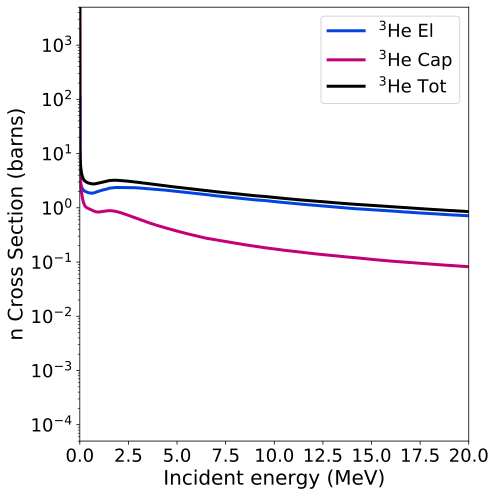

In [58]:
plt.figure(figsize=(7,7))

plt.plot(He3_N_El[0]*1e-6,He3_N_El[1],label="$^{3}$He El",color='xkcd:blue',lw=3)
plt.plot(He3cross[0]*1e-6,He3cross[1],label="$^{3}$He Cap",color='xkcd:magenta',lw=3)
plt.plot(He3_N_Tot[0]*1e-6,He3_N_Tot[1],label="$^{3}$He Tot",color='xkcd:black',lw=3)

# plt.semilogx()
plt.semilogy()
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
plt.ylim(5e-5,5000)  
plt.xlim(0,20)
plt.ylabel("n Cross Section (barns)",fontsize=20)
plt.xlabel('Incident energy (MeV)',fontsize=20)
plt.tight_layout()
plt.legend(fontsize=18,loc='upper right')
plt.show()

Thermal and Fast Neutrons

In [75]:
# Enums for plotting
class Xe(Enum):
    k_Xe131_Th = 0
    k_Xe126_Th = 1
    k_He3_Th   = 2
    k_EXeAr_Th = 3
    k_BF3_Th   = 4
    k_He4_Th   = 5
    k_Xe131_F  = 6
    k_Xe126_F  = 7
    k_He3_F    = 8
    k_EXeAr_F  = 9
    k_BF3_F    = 10

# Names of elements and type to plot
names = [
    "Xe131 Thermal",
    "Xe126 Thermal",
    "He3 Thermal",
    "Ar Thermal",
    "BF3 Thermal",
    "He4 Thermal",
    "Xe131 Fast",
    "Xe126 Fast",
    "He3 Fast",
    "Ar Fast",
    "BF3 Fast"
    ]

# The corresponding paths to the names above
files = [
    "../outputs/Xe131Thermal/*",
    "../outputs/Xe126Thermal/*",
    "../outputs/XeHeThermal/*",
    "../outputs/EXeArThermal/*",
    "../outputs/BF3Thermal/*",
    "../outputs/XeHe4Thermal/*",
    "../outputs/Xe131Fast/*",
    "../outputs/Xe126Fast/*",
    "../outputs/XeHeFast/*",
    "../outputs/EXeArFast/*",
    "../outputs/BF3Fast/*",
    ]

neutrons = []
# Load in the files
for f in files:
    neutrons.append(sorted(glob.glob(f), reverse=True))

In [76]:
# Get the main information from the file for this study
neutrons_E     = [] # Array of array of dataframe containing energies of thermal neutrons [parent gas][Energies]
neutrons_Xe137 = [] # Array of array of Total Xe137 produced [parent gas][total Xe137]
Metadata       = [] # Array of array of metadata [parent gas][Metadata]
neutrons_tot   = [] # Array of array of Total simulated neutrons [parent gas][total sim n]
pct            = [] # Array of array containing percentages run [parent gas][percentage]
Elem_n_Cap     = [] # Array of array containing the names of the elements that capture a neutron [parent gas][elements]

# Loop over the files
for n in neutrons:

    temp_neutrons_E     = []
    temp_neutrons_Xe137 = []
    temp_Metadata       = []
    temp_neutrons_tot   = []
    temp_pct            = []
    temp_Elem_n_Cap     = []
    
    # Load in the dataframes
    for idx, f in enumerate(n):
        temp_neutrons_E    .append(pd.read_hdf(f,'Energy'))
        temp_neutrons_Xe137.append(len(temp_neutrons_E[idx]))
        temp_Metadata      = pd.read_hdf(f,'Metadata')
        temp_neutrons_tot  .append(temp_Metadata['Num_Events'].sum())
        temp_pct           .append(float(temp_Metadata['Percentage'].iloc[0]))
        temp_other         = pd.read_hdf(f,'Other')
        temp_Elem_n_Cap    .append(temp_other)

        # print(temp_neutrons_tot[idx], temp_neutrons_Xe137[idx], temp_pct[idx])
        # print(temp_neutrons_E[idx])

    neutrons_E.append(temp_neutrons_E)
    neutrons_Xe137.append(temp_neutrons_Xe137)
    Metadata.append(temp_Metadata)
    neutrons_tot.append(temp_neutrons_tot)
    pct.append(temp_pct)
    Elem_n_Cap.append(temp_Elem_n_Cap)


In [136]:
# Calculate the total number of Xe137 from neutron capture normalised by the enrichment
# Standard Parameters
Volume = 3.14159265359 * 1.3 * 1.3 * 2.6 # Total volume of the detector in m3

# Densities of gases at 15 bar 300K
rho_Xe  = 86.955  # kg/m3
rho_He  = 2.3748  # kg/m3
rho_Ar  = 24.2369 # kg/m3
rho_BF3 = 40.8    # kg/m3

neutrons_tot_norm = []
# Loop over the types
for idx, n in enumerate(neutrons):
    
    # Normalised events = (N137 / Enrich * MASS ) / total sim
    neutrons_Xe137[idx] = np.asarray(neutrons_Xe137[idx])
    neutrons_tot[idx]   = np.asarray(neutrons_tot[idx])
    pct[idx]            = np.asarray(pct[idx])

    # Helium
    if idx == Xe.k_He3_Th.value or idx == Xe.k_He3_F.value or idx == Xe.k_He4_Th.value:
        Enrich_Xe136 = 0.902616 # Enrichment of Xenon 136
        Mass = ((1.0 - 0.01*pct[idx]) * rho_He + 0.01*pct[idx]*rho_Xe) * Volume
        neutrons_tot_norm.append(neutrons_Xe137[idx] / ( neutrons_tot[idx] * Enrich_Xe136 * 0.01*pct[idx] * Mass))
    
    # Argon
    elif idx == Xe.k_EXeAr_Th.value or idx == Xe.k_EXeAr_F.value:
        Enrich_Xe136 = 0.902616 # Enrichment of Xenon 136
        Mass = ((1.0 - 0.01*pct[idx]) * rho_Ar + 0.01*pct[idx]*rho_Xe) * Volume
        neutrons_tot_norm.append(neutrons_Xe137[idx] / ( neutrons_tot[idx] * Enrich_Xe136 * 0.01*pct[idx] * Mass))
    
    # BF3
    elif idx == Xe.k_BF3_Th.value or idx == Xe.k_BF3_F.value:
        Enrich_Xe136 = 0.902616 # Enrichment of Xenon 136
        Mass = ((1.0 - 0.01*pct[idx]) * rho_BF3 + 0.01*pct[idx]*rho_Xe) * Volume
        neutrons_tot_norm.append(neutrons_Xe137[idx] / ( neutrons_tot[idx] * Enrich_Xe136 * 0.01*pct[idx] * Mass))
    
    # Xenon gases
    else:
        Enrich_Xe136 = (0.902616 + 0.00234361) - 0.01*pct[idx] # Enrichment of Xenon 136
        Mass = rho_Xe * Volume
        neutrons_tot_norm.append(neutrons_Xe137[idx] / ( neutrons_tot[idx] * Enrich_Xe136 *  Mass))


/Users/mistryk2/opt/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/Users/mistryk2/opt/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/Users/mistryk2/opt/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


In [137]:
# Calculate the Statistical Uncertainties
neutrons_Err      = [] # Statistical Uncertainty

# Loop over Xe Isoptopes
for idx in range(0, len(neutrons)):

    temp_neutrons_Err = []

    # Loop over the percentages
    for p in range(0, len(neutrons_Xe137[idx])):

        # Calculate the error, catch divide by 0
        if neutrons_Xe137[idx][p] == 0:
            temp_neutrons_Err.append(0.0)
        else: 
            temp_neutrons_Err.append(neutrons_tot_norm[idx][p] * np.sqrt(1 / neutrons_Xe137[idx][p]))

    neutrons_Err.append(temp_neutrons_Err)


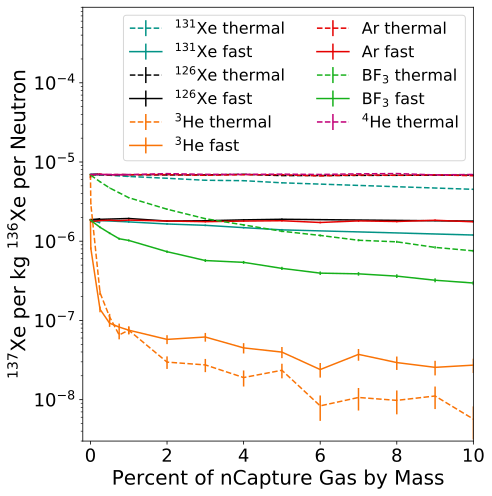

In [145]:
# Make the Plot
plt.figure(figsize=(7,7))
# plt.errorbar(100 - pct, Fneutrons_tot_norm, color="k", yerr=Fneutrons_Err,fmt='s',label="$^{3}$He fast",ms=7, ls='--')
plt.errorbar(pct[Xe.k_Xe131_Th.value], neutrons_tot_norm[Xe.k_Xe131_Th.value], color="xkcd:teal", yerr=neutrons_Err[Xe.k_Xe131_Th.value],fmt='-',label="$^{131}$Xe thermal",ms=9, ls='--')
plt.errorbar(pct[Xe.k_Xe131_F.value], neutrons_tot_norm[Xe.k_Xe131_F.value], color="xkcd:teal", yerr=neutrons_Err[Xe.k_Xe131_F.value],fmt='-',label="$^{131}$Xe fast",ms=9, ls='-')

plt.errorbar(pct[Xe.k_Xe126_Th.value], neutrons_tot_norm[Xe.k_Xe126_Th.value], color="xkcd:black", yerr=neutrons_Err[Xe.k_Xe126_Th.value],fmt='-',label="$^{126}$Xe thermal",ms=9, ls='--')
plt.errorbar(pct[Xe.k_Xe126_F.value], neutrons_tot_norm[Xe.k_Xe126_F.value], color="xkcd:black", yerr=neutrons_Err[Xe.k_Xe126_F.value],fmt='-',label="$^{126}$Xe fast",ms=9, ls='-')

plt.errorbar(100-pct[Xe.k_He3_Th.value], neutrons_tot_norm[Xe.k_He3_Th.value], color="xkcd:orange", yerr=neutrons_Err[Xe.k_He3_Th.value],fmt='-',label="$^{3}$He thermal",ms=9, ls='--')
plt.errorbar(100-pct[Xe.k_He3_F.value], neutrons_tot_norm[Xe.k_He3_F.value], color="xkcd:orange", yerr=neutrons_Err[Xe.k_He3_F.value],fmt='-',label="$^{3}$He fast",ms=9, ls='-')

plt.errorbar(100-pct[Xe.k_EXeAr_Th.value], neutrons_tot_norm[Xe.k_EXeAr_Th.value], color="xkcd:red", yerr=neutrons_Err[Xe.k_EXeAr_Th.value],fmt='-',label="Ar thermal",ms=9, ls='--')
plt.errorbar(100-pct[Xe.k_EXeAr_F.value], neutrons_tot_norm[Xe.k_EXeAr_F.value], color="xkcd:red", yerr=neutrons_Err[Xe.k_EXeAr_F.value],fmt='-',label="Ar fast",ms=9, ls='-')

plt.errorbar(100-pct[Xe.k_BF3_Th.value], neutrons_tot_norm[Xe.k_BF3_Th.value], color="xkcd:green", yerr=neutrons_Err[Xe.k_BF3_Th.value],fmt='-',label="BF$_3$ thermal",ms=9, ls='--')
plt.errorbar(100-pct[Xe.k_BF3_F.value], neutrons_tot_norm[Xe.k_BF3_F.value], color="xkcd:green", yerr=neutrons_Err[Xe.k_BF3_F.value],fmt='-',label="BF$_3$ fast",ms=9, ls='-')

plt.errorbar(100-pct[Xe.k_He4_Th.value], neutrons_tot_norm[Xe.k_He4_Th.value], color="xkcd:magenta", yerr=neutrons_Err[Xe.k_He4_Th.value],fmt='-',label="$^{4}$He thermal",ms=9, ls='--')

plt.semilogy()
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
plt.xlim(-.2,10) 

plt.ylim(3e-9,9e-4)  
# plt.ylim(3e-9,9e-5)  
plt.ylabel("$^{137}$Xe per kg $^{136}$Xe per Neutron",fontsize=20)
plt.yticks(fontsize=18) 
plt.xlabel('Percent of nCapture Gas by Mass',fontsize=20)
plt.tight_layout()
plt.legend(fontsize=16,loc=1,ncol=2)
plt.show()

,E_Xe137,E_n_Capture
0,10.0,1.075318
0,10.0,0.609876
0,10.0,1.065602
0,10.0,0.568688


<Figure size 20000x20000 with 0 Axes>

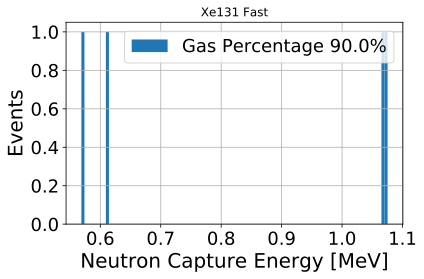

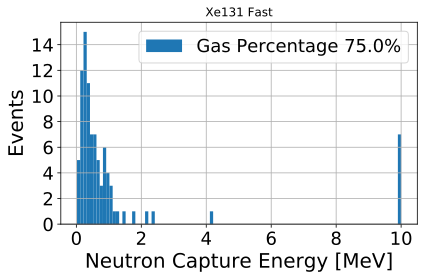

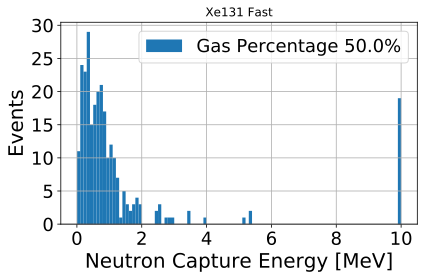

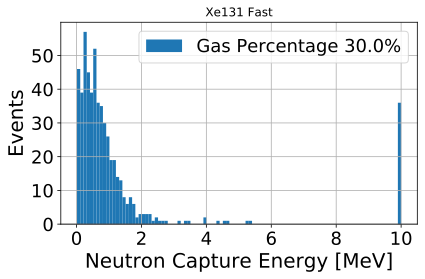

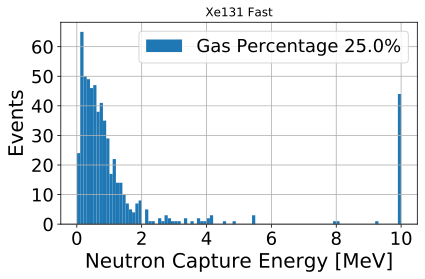

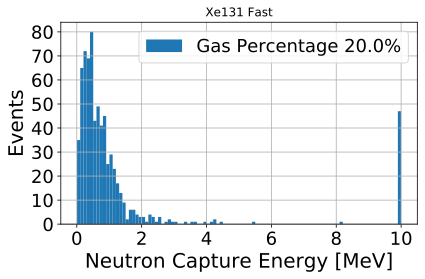

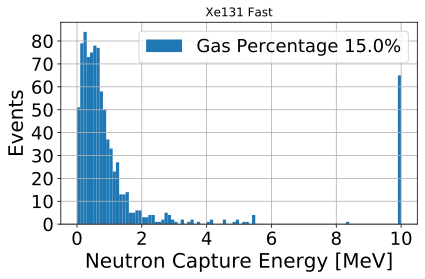

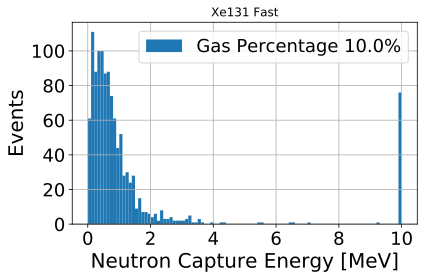

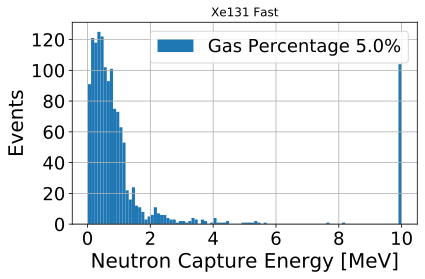

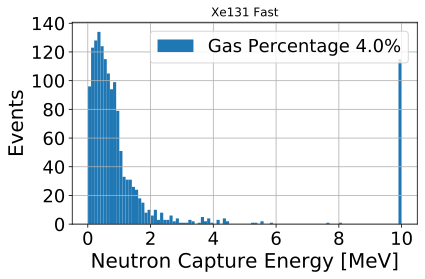

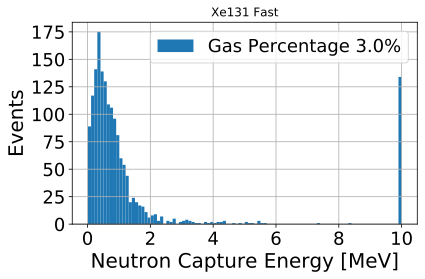

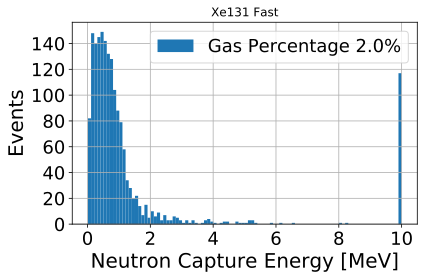

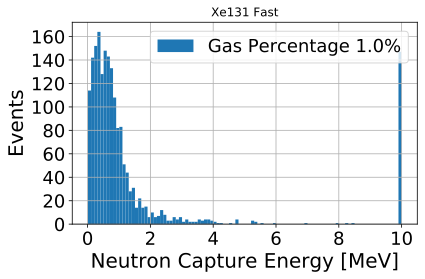

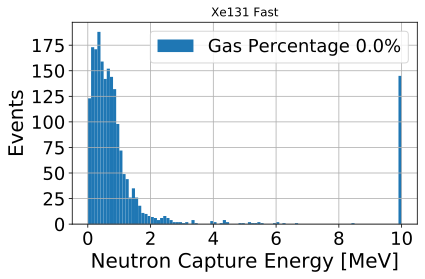

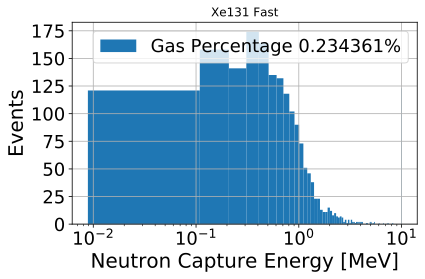

In [ ]:
# Plot the neutron energy at Capture
plt.figure(figsize=(50,50),dpi=400)

iname =2
for indx in range(len(neutrons_E[iname])):
    neutrons_E[iname][indx].hist(column="E_n_Capture", bins =100, label="Gas Percentage " + str(pct[2][indx]) + "%")
    plt.ylabel("Events",fontsize=20)
    plt.xlabel('Neutron Capture Energy [MeV]',fontsize=20)
    plt.yticks(fontsize=18)  
    plt.xticks(fontsize=18)
    plt.tight_layout()
    plt.legend(fontsize=18,loc=1,ncol=2)
    plt.title(str(names[iname]))
    # plt.xlim(25e-9,2)
    # plt.xlim(0,15e-6)


plt.semilogx()

display(neutrons_E[2][0])

<Figure size 20000x20000 with 0 Axes>

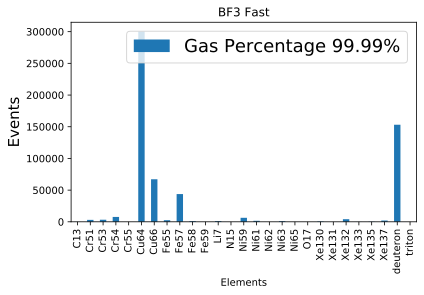

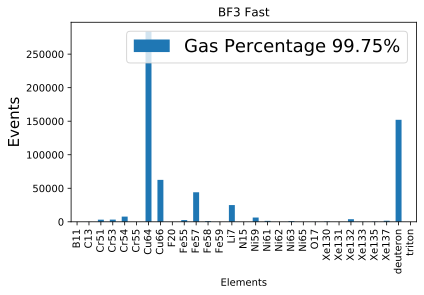

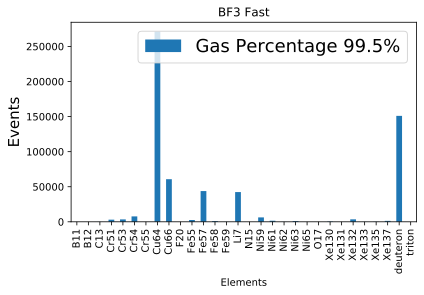

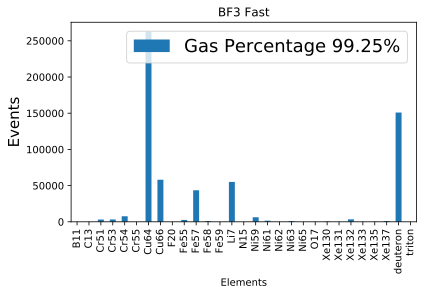

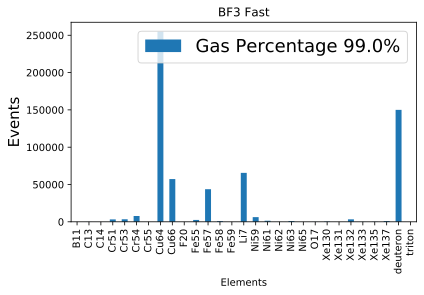

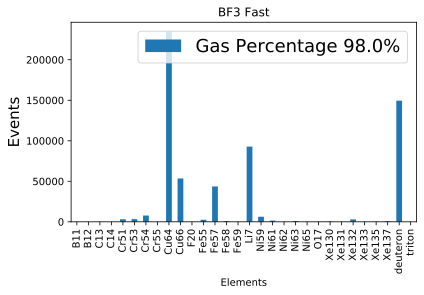

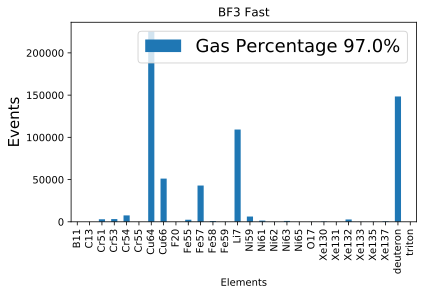

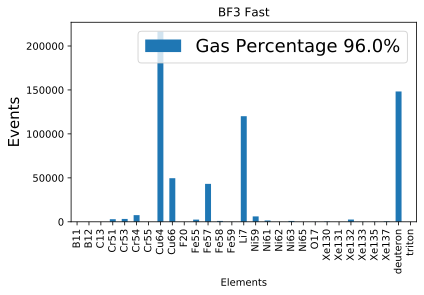

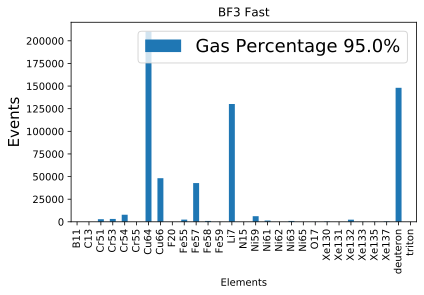

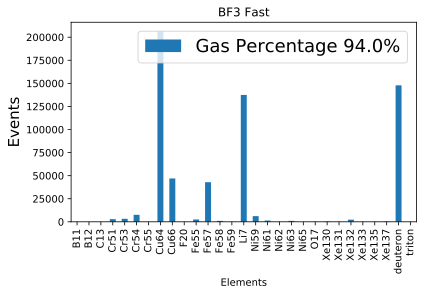

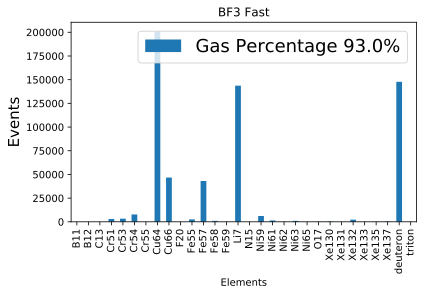

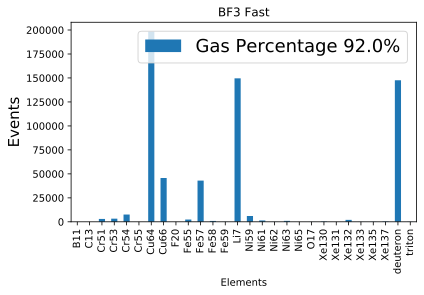

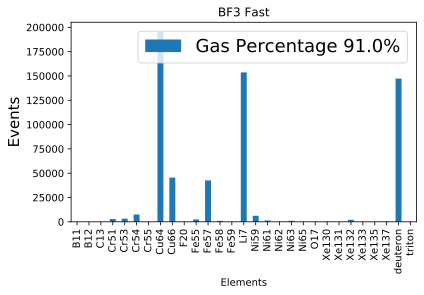

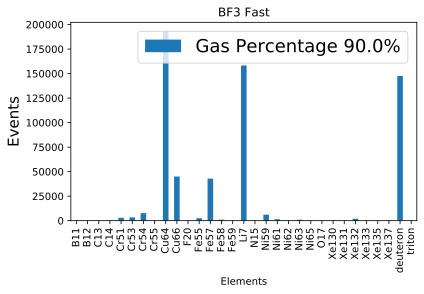

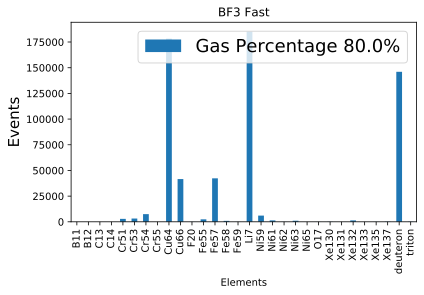

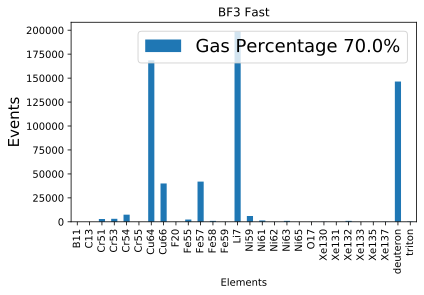

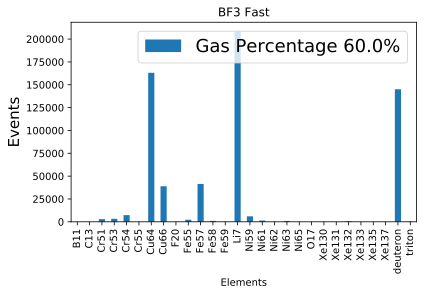

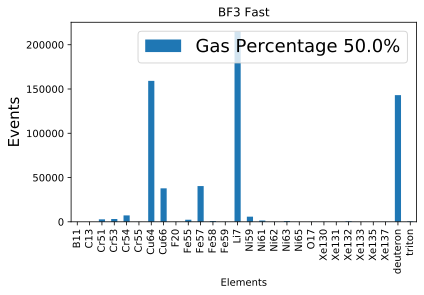

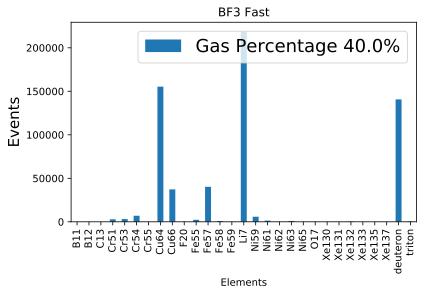

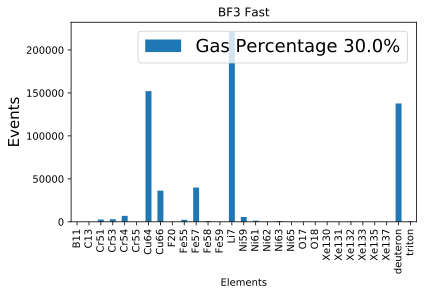

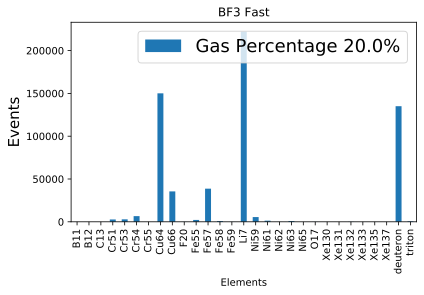

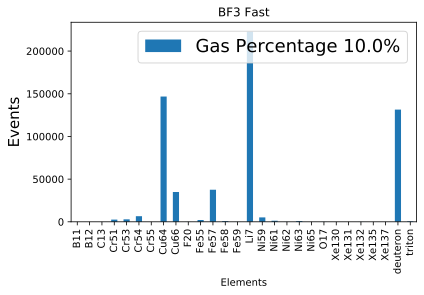

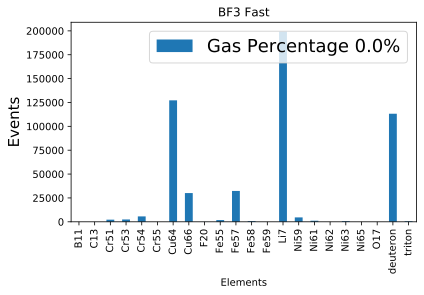

In [104]:
# Plot the Neutron Capture element breakdown
plt.figure(figsize=(50,50),dpi=400)
iname = 10
for indx in range(len(Elem_n_Cap[iname])):
    elements = Counter(Elem_n_Cap[iname][indx]['Elem_n_Capture'])
    df = pd.DataFrame.from_dict(elements, orient='index')


    # Sort the dataframe by the element name
    df.index.name = "Elements"
    df = df.sort_values(by='Elements')


    df.plot(kind='bar',label="Gas Percentage " + str(pct[iname][indx]) + "%")
    plt.ylabel("Events",fontsize=15)
    # plt.xlabel('Neutron Capture Energy [MeV]',fontsize=20)
    # plt.yticks(fontsize=18)  
    # plt.xticks(fontsize=18)
    plt.tight_layout()
    plt.legend(["Gas Percentage " + str(pct[iname][indx]) + "%"],fontsize=18,loc=1,ncol=2)
    plt.title(str(names[iname]))
    # plt.ylim(0,2000)
    # plt.semilogy()

    # display(df)


# display(Elem_n_Cap[2][0])\